In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import imageio.v2
import imageio.v2 as imageio
import random
# import cv2
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adamax


In [2]:
pip install --upgrade tensorflow

Could not fetch URL https://pypi.org/simple/tensorflow/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/tensorflow/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self-signed certificate in certificate chain (_ssl.c:1006)'))) - skipping
Note: you may need to restart the kernel to use updated packages.


In [2]:
data_dir = r"C:\shubham\shubham\Charusat\4th sem\Project(Practice)\kaggle\input\lung_colon_image_set"

In [3]:
filepaths = []
labels = []
folds = os.listdir(data_dir)
for fold in folds:
    foldpath = os.path.join(data_dir, fold)
    flist = os.listdir(foldpath)

    for f in flist:
        f_path = os.path.join(foldpath, f)
        filelist = os.listdir(f_path)

        for file in filelist:
            
            fpath = os.path.join(f_path, file)
            filepaths.append(fpath)

            if f == 'lung_aca':
                labels.append('Lung Adenocarcinoma')

            elif f == 'lung_n':
                labels.append('Lung Benign Tissue')

            elif f == 'lung_scc':
                labels.append('Lung Squamous Cell Carcinoma')

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name='filepaths')
Lseries = pd.Series(labels, name='labels')
df = pd.concat([Fseries, Lseries], axis=1)

# Display the DataFrame
df


filepaths  \
0      C:\shubham\shubham\Charusat\4th sem\Project(Pr...   
1      C:\shubham\shubham\Charusat\4th sem\Project(Pr...   
2      C:\shubham\shubham\Charusat\4th sem\Project(Pr...   
3      C:\shubham\shubham\Charusat\4th sem\Project(Pr...   
4      C:\shubham\shubham\Charusat\4th sem\Project(Pr...   
...                                                  ...   
14995  C:\shubham\shubham\Charusat\4th sem\Project(Pr...   
14996  C:\shubham\shubham\Charusat\4th sem\Project(Pr...   
14997  C:\shubham\shubham\Charusat\4th sem\Project(Pr...   
14998  C:\shubham\shubham\Charusat\4th sem\Project(Pr...   
14999  C:\shubham\shubham\Charusat\4th sem\Project(Pr...   

                             labels  
0               Lung Adenocarcinoma  
1               Lung Adenocarcinoma  
2               Lung Adenocarcinoma  
3               Lung Adenocarcinoma  
4               Lung Adenocarcinoma  
...                             ...  
14995  Lung Squamous Cell Carcinoma  
14996  Lung Squamous Cell Carcinoma  
14997  Lung Squamous Cell Carcinoma  
14998  Lung Squamous Cell Carcinoma  
14999  Lung Squamous Cell Carcinoma  

[15000 rows x 2 columns]

In [4]:
df.isnull().sum()

filepaths    0
labels       0
dtype: int64

In [5]:
label_counts = df['labels'].value_counts()
label_counts

labels
Lung Adenocarcinoma             5000
Lung Benign Tissue              5000
Lung Squamous Cell Carcinoma    5000
Name: count, dtype: int64

In [6]:
total_count = df['labels'].value_counts().sum()
total_count

15000

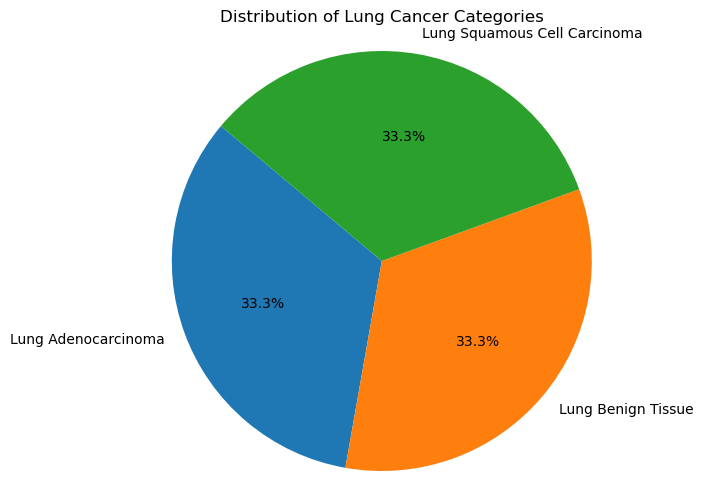

In [7]:
# Assuming you have defined the counts of each category
categories = ['Lung Adenocarcinoma','Lung Benign Tissue','Lung Squamous Cell Carcinoma']
counts = [10000,10000,10000]  # Replace these values with the actual counts of images for each category

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Lung Cancer Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# Show the pie chart
plt.show()

In [10]:
strat = df['labels']
train_df, dummy_df = train_test_split(df,  train_size= 0.8, shuffle= True, random_state= 123, stratify= strat)

# # valid and test dataframe
strat = dummy_df['labels']
valid_df, test_df = train_test_split(dummy_df,  train_size= 0.5, shuffle= True, random_state= 123, stratify= strat)


In [68]:
batch_size = 64
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                        color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 12000 validated image filenames belonging to 3 classes.
Found 1500 validated image filenames belonging to 3 classes.
Found 1500 validated image filenames belonging to 3 classes.


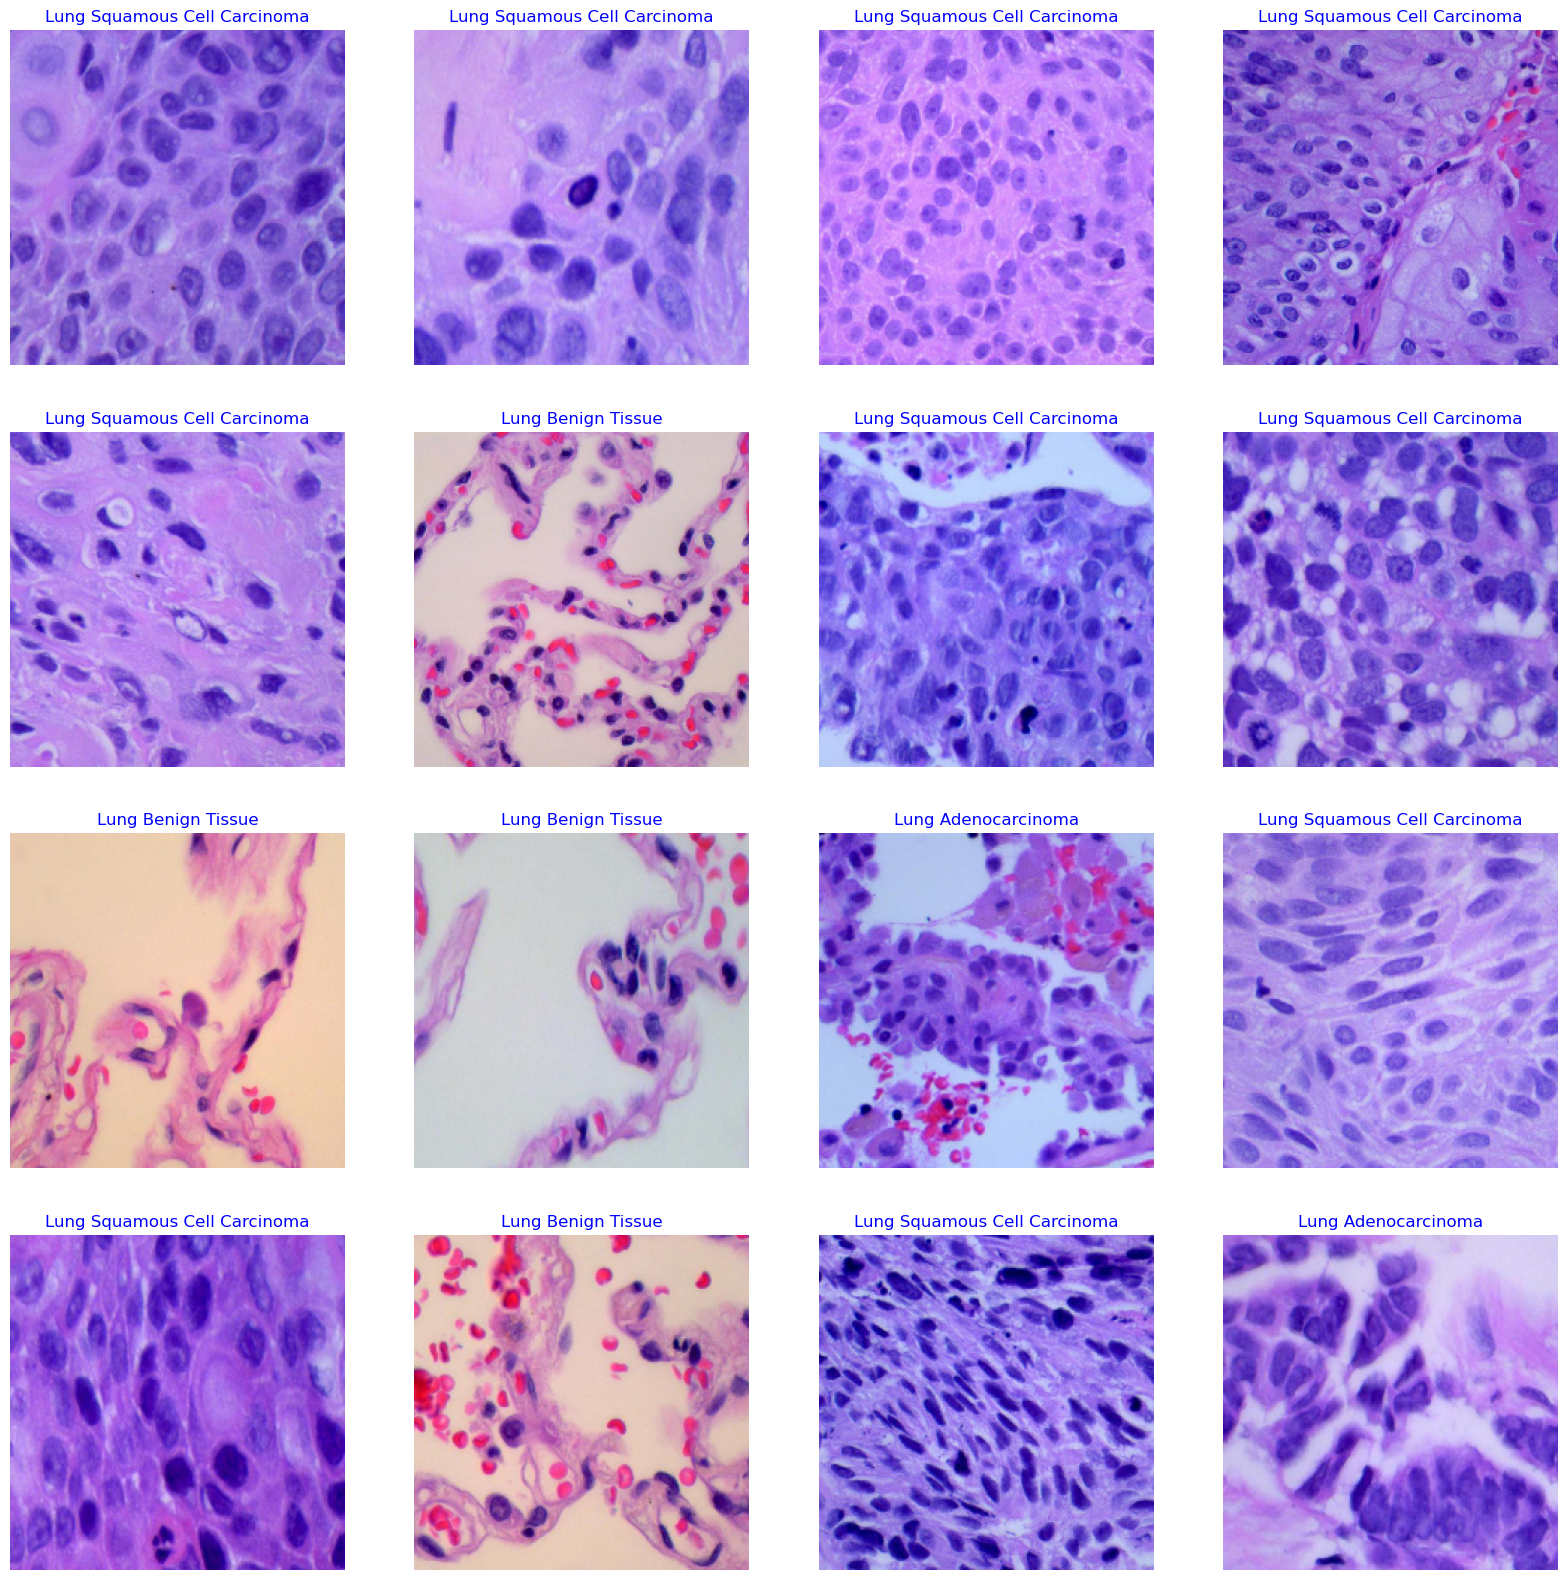

In [59]:
g_dict = train_gen.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_gen)      # get a batch size samples from the generator

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       # scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
plt.show()

In [60]:
# Create Model Structure
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys()))

model = Sequential([
    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", input_shape= img_shape),
    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(256,activation = "relu"),
    Dense(64,activation = "relu"),
    Dense(class_count, activation = "softmax")
])

model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])




C:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [61]:
# epochs = 20   # number of all epochs in training

# history = model.fit(x= train_gen, epochs= epochs, verbose= 1, validation_data= test_gen, 
#                     validation_steps= None, shuffle= False)

In [62]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.models.Sequential([
    # First Conv layer with input shape defined
    layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=img_shape, padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Additional Conv layers
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Flatten to connect to Dense layers
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),

    # Output layer
    layers.Dense(3, activation='softmax')
])

In [63]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_48 (Conv2D)                   │ (None, 224, 224, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_49 (Conv2D)                   │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_50 (Conv2D)                   │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 256)                 │      25,690,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,819,971 (98.50 MB)

 Trainable params: 25,819,203 (98.49 MB)

 Non-trainable params: 768 (3.00 KB)

In [64]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [65]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_accuracy') > 0.90:
            print('\nValidation accuracy has reached 90%, stopping further training.')
            self.model.stop_training = True
 
es = EarlyStopping(patience=3,
                   monitor='val_accuracy',
                   restore_best_weights=True)
 
lr = ReduceLROnPlateau(monitor='val_loss',
                       patience=2,
                       factor=0.5,
                       verbose=1)


<!-- model.fit(train_df,dummy_df
                    validation_data=(train_df,dummy_df),
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    verbose=1,
                    callbacks=[es, lr, myCallback()]) -->

In [19]:
# epochs =  # number of all epochs in training

# history = model.fit(x= train_gen, epochs= epochs, verbose= 1, validation_data= test_gen, 
#                     validation_steps= None, shuffle= False)

In [75]:
# Y_pred = model.predict(test_df)
# Y_val = np.argmax(test_df, axis=1)
# Y_pred = np.argmax(Y_pred, axis=1)

In [23]:
# # Define needed variables
# tr_acc = history.history['accuracy']
# tr_loss = history.history['loss']
# val_acc = history.history['val_accuracy']
# val_loss = history.history['val_loss']
# index_loss = np.argmin(val_loss)
# val_lowest = val_loss[index_loss]
# index_acc = np.argmax(val_acc)
# acc_highest = val_acc[index_acc]
# Epochs = [i+1 for i in range(len(tr_acc))]
# loss_label = f'best epoch= {str(index_loss + 1)}'
# acc_label = f'best epoch= {str(index_acc + 1)}'

# # Plot training history
# plt.figure(figsize= (20, 8))
# plt.style.use('fivethirtyeight')

# plt.subplot(1, 2, 1)
# plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
# plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
# plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

# plt.subplot(1, 2, 2)
# plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
# plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
# plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
# plt.title('Training and Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()

# plt.tight_layout
# plt.show()

In [19]:
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Valid Loss: ", valid_score[0])
print("Valid Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

20/20 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.3357 - loss: 27.2176
20/20 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.2960 - loss: 29.0020
20/20 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.3395 - loss: 27.4268
Train Loss:  27.54803466796875
Train Accuracy:  0.32421875
--------------------
Valid Loss:  27.548715591430664
Valid Accuracy:  0.33203125
--------------------
Test Loss:  27.30326271057129
Test Accuracy:  0.33906251192092896


In [20]:
preds = model.predict(test_gen)
y_pred = np.argmax(preds, axis=1)

24/24 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step


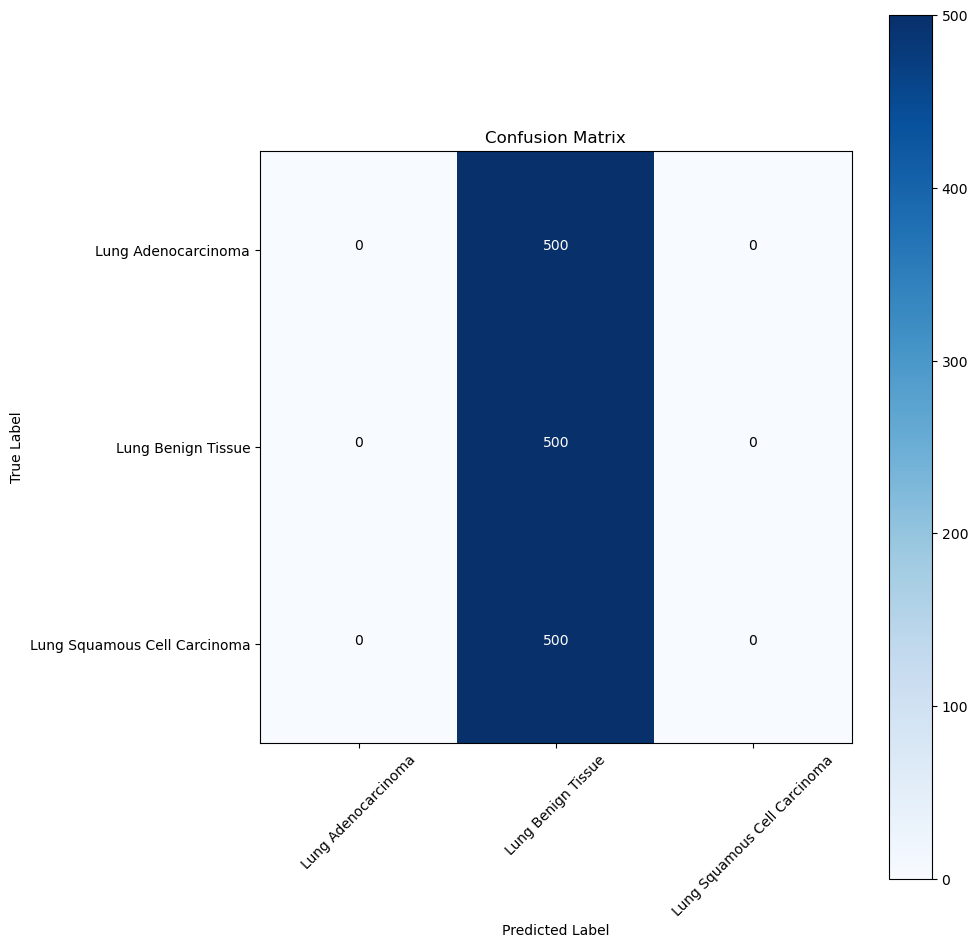

In [21]:
import itertools
from sklearn.metrics import confusion_matrix
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [27]:
from sklearn.metrics import classification_report

# Assuming 'y_pred' is the array of predicted labels from your model
# and 'test_gen.classes' contains the true labels

# Classification report
report = classification_report(test_gen.classes, y_pred, target_names=classes)
print(report)


                              precision    recall  f1-score   support

         Lung Adenocarcinoma       0.00      0.00      0.00       500
          Lung Benign Tissue       0.00      0.00      0.00       500
Lung Squamous Cell Carcinoma       0.33      1.00      0.50       500

                    accuracy                           0.33      1500
                   macro avg       0.11      0.33      0.17      1500
                weighted avg       0.11      0.33      0.17      1500



C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
model.save('Model.keras')

In [70]:
model = tf.keras.models.load_model('Model.h5', compile=False)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [73]:
from PIL import Image
import tensorflow as tf

image_path = r'C:\shubham\shubham\Charusat\4th sem\lungscc16.jpeg'
image = Image.open(image_path)

# Preprocess the image
img = image.resize((224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

# Make predictions
predictions = model.predict(img_array)
class_labels = classes
score = tf.nn.softmax(predictions[0])
print(f"{class_labels[tf.argmax(score)]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Lung Squamous Cell Carcinoma
